In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Load dataset
data=pd.read_csv(r'C:\Users\VIJAY\Downloads\index (1).csv')

In [3]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.shape

(1133, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [7]:
data.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [8]:
#check null values
data.isnull().sum()
# Visualize null values

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
# fill null values
miss_values={
    'card':'unknown',
}
data.fillna(miss_values, inplace=True)


In [10]:
data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [11]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [12]:
# 1. Count how many times each coffee appears
coffee_counts = data['coffee_name'].value_counts()

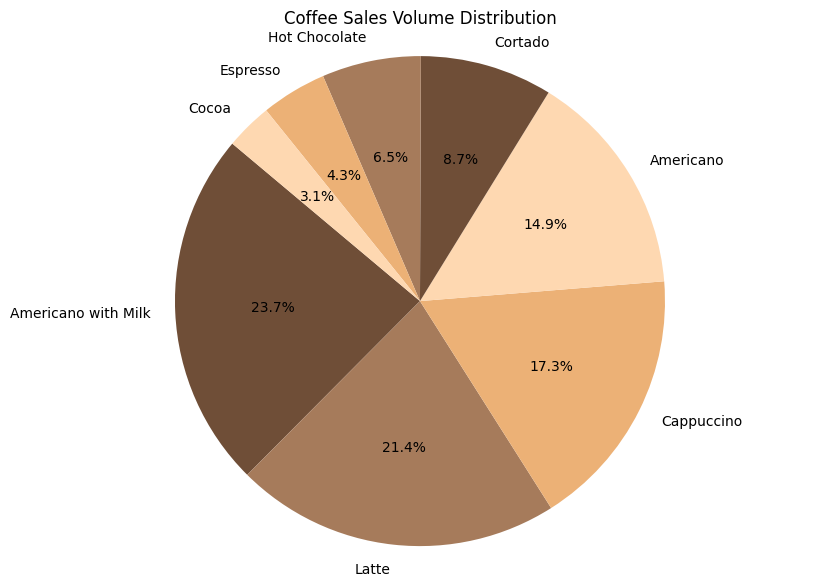

In [13]:
# 2. Create the plot
plt.figure(figsize=(10, 7))
plt.pie(coffee_counts, 
        labels=coffee_counts.index, 
        autopct='%1.1f%%', # Shows the percentage
        startangle=140, 
        colors=['#6F4E37', '#A67B5B', '#ECB176', '#FED8B1']) # Coffee-themed colors

plt.title('Coffee Sales Volume Distribution')
plt.axis('equal') # Ensures the pie is a circle
plt.show()

In [14]:
# 1. Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

In [15]:
# 2. Group by 'date' to get the total money earned per day
daily_sales = data.groupby('date')['money'].sum().reset_index()

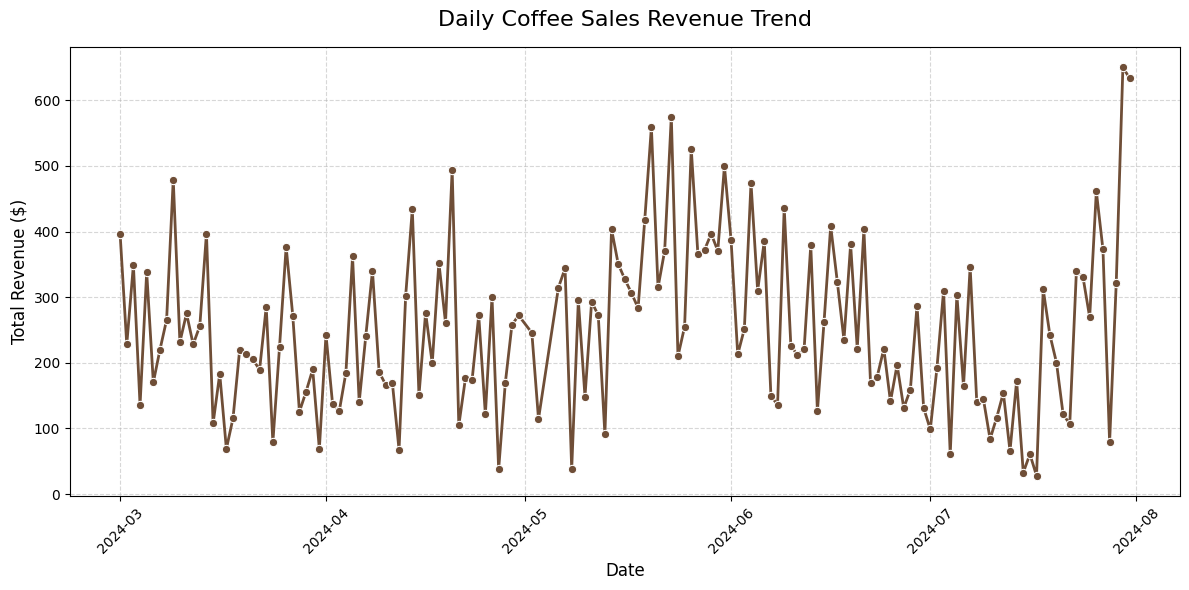

In [16]:
# 3. Create the Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o', color='#6F4E37', linewidth=2)
# 4. Professional Styling
plt.title('Daily Coffee Sales Revenue Trend', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45) # Tilts dates for better readability

plt.tight_layout()
plt.show()

In [17]:
#heatmap
# 1. Prepare the data
# Ensure datetime is in the correct format
data['datetime'] = pd.to_datetime(data['datetime'])

In [18]:
# Extract Hour and Day Name
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()

In [19]:
# 2. Create a Pivot Table
# We count the number of transactions per hour/day
heatmap_data = data.pivot_table(index='day_of_week', 
                                columns='hour', 
                                values='money', 
                                aggfunc='count').fillna(0)

In [20]:
# Reorder days so they aren't alphabetical (Monday -> Sunday)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days)

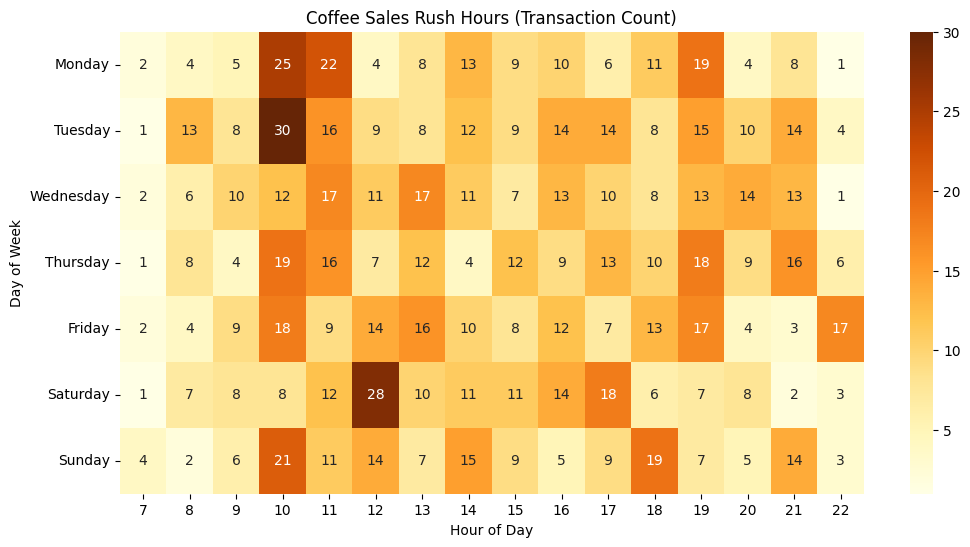

In [21]:
# 3. Plot the Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrBr', fmt='g')
plt.title('Coffee Sales Rush Hours (Transaction Count)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [22]:
# 1. Prepare the data
# Group by 'coffee_name' and calculate total sales (sum) or popularity (count)
# Here we calculate Total Revenue per product
coffee_sales = data.groupby('coffee_name')['money'].sum().reset_index()

In [23]:
# Sort the data so the highest-selling coffee is at the top/left
coffee_sales = coffee_sales.sort_values('money', ascending=False)

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_8372\1820330609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x='money', y='coffee_name', palette='copper')


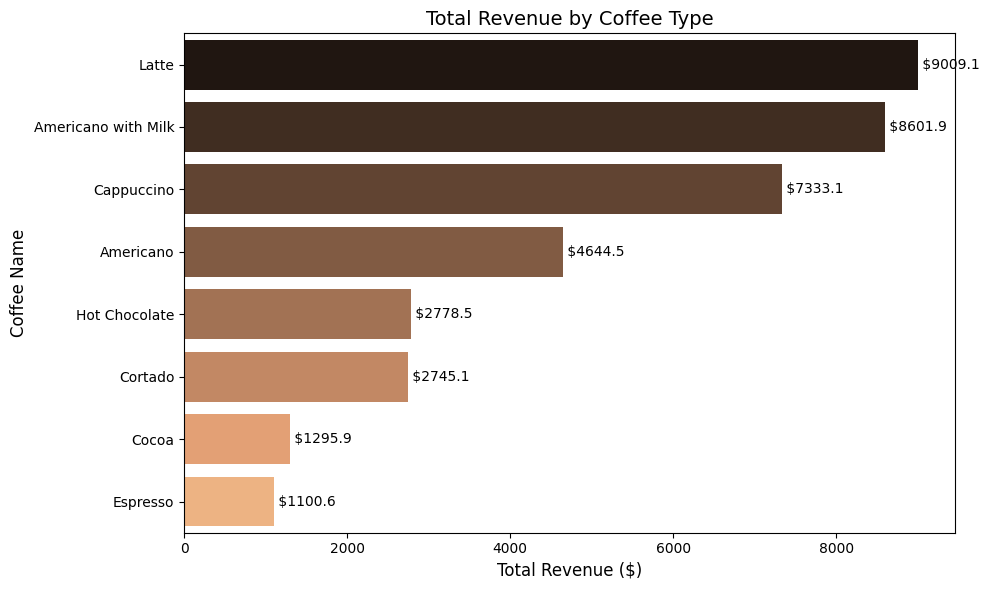

In [24]:
# 2. Plot the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_sales, x='money', y='coffee_name', palette='copper')
# 3. Format the graph
plt.title('Total Revenue by Coffee Type', fontsize=14)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Coffee Name', fontsize=12)

# Optional: Add data labels to the ends of the bars
for index, value in enumerate(coffee_sales['money']):
    plt.text(value, index, f' ${value:.1f}', va='center')

plt.tight_layout()
plt.show()